##### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочных данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = model_tsne.fit_transform(X_train_scaled)

In [8]:
X_train.shape, X_train_tsne.shape

((404, 13), (404, 2))

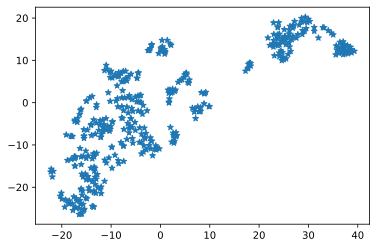

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], marker='*')
plt.show()

##### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

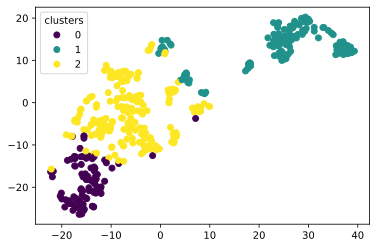

In [12]:
fig, ax = plt.subplots()
sc = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [13]:
mean_price_0 = y_train[labels_train == 0].mean()
mean_price_1 = y_train[labels_train == 1].mean()
mean_price_2 = y_train[labels_train == 2].mean()

mean_CRIM_0 = X_train.loc[labels_train == 0, "CRIM"].mean()
mean_CRIM_1 = X_train.loc[labels_train == 1, "CRIM"].mean()
mean_CRIM_2 = X_train.loc[labels_train == 2, "CRIM"].mean()

In [14]:
print(f'Средняя цена в кластере 0: {mean_price_0[0]:.3f}')
print(f'Средний показатель CRIM в кластере 0: {mean_CRIM_0:.3f}')
print()
print(f'Средняя цена в кластере 1: {mean_price_1[0]:.3f}')
print(f'Средний показатель CRIM в кластере 1: {mean_CRIM_1:.3f}')
print()
print(f'Средняя цена в кластере 2: {mean_price_2[0]:.3f}')
print(f'Средний показатель CRIM в кластере 2: {mean_CRIM_2:.3f}')

Средняя цена в кластере 0: 27.788
Средний показатель CRIM в кластере 0: 0.074

Средняя цена в кластере 1: 16.165
Средний показатель CRIM в кластере 1: 10.797

Средняя цена в кластере 2: 24.958
Средний показатель CRIM в кластере 2: 0.422


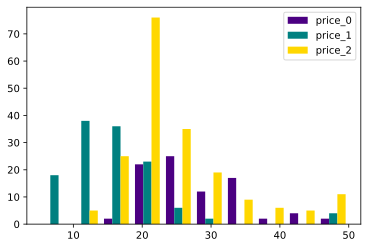

In [15]:
plt.hist([y_train[labels_train == 0]['price'], y_train[labels_train == 1]['price'], y_train[labels_train == 2]['price']], 
         bins=10, color=['indigo', 'teal', 'gold'], label=['price_0', 'price_1', 'price_2'])
plt.legend()
plt.show()

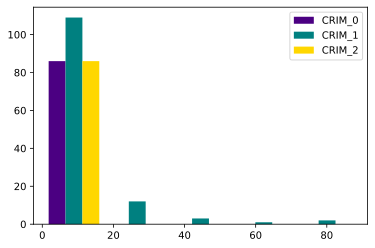

In [16]:
plt.hist([X_train.loc[labels_train == 0, "CRIM"], X_train.loc[labels_train == 1, "CRIM"], X_train.loc[labels_train == 0, "CRIM"]], 
         bins=5, color=['indigo', 'teal', 'gold'], label=['CRIM_0', 'CRIM_1', 'CRIM_2'])
plt.legend()
plt.show()

##### Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [17]:
X_test_tsne = model_tsne.fit_transform(X_test_scaled)
labels_test = kmeans.predict(X_test_scaled)

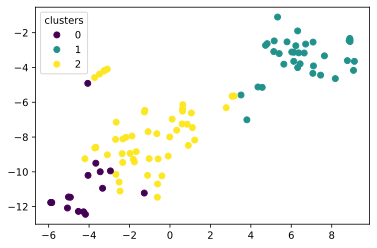

In [18]:
fig, ax = plt.subplots()
sc = ax.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [19]:
mean_price_0_test = y_test[labels_test == 0].mean()
mean_price_1_test = y_test[labels_test == 1].mean()
mean_price_2_test = y_test[labels_test == 2].mean()

mean_CRIM_0_test = X_test.loc[labels_test == 0, "CRIM"].mean()
mean_CRIM_1_test = X_test.loc[labels_test == 1, "CRIM"].mean()
mean_CRIM_2_test = X_test.loc[labels_test == 2, "CRIM"].mean()

In [20]:
print(f'Средняя цена в кластере 0: {mean_price_0_test[0]:.3f}')
print(f'Средний показатель CRIM в кластере 0: {mean_CRIM_0_test:.3f}')
print()
print(f'Средняя цена в кластере 1: {mean_price_1_test[0]:.3f}')
print(f'Средний показатель CRIM в кластере 1: {mean_CRIM_1_test:.3f}')
print()
print(f'Средняя цена в кластере 2: {mean_price_2_test[0]:.3f}')
print(f'Средний показатель CRIM в кластере 2: {mean_CRIM_2_test:.3f}')

Средняя цена в кластере 0: 31.350
Средний показатель CRIM в кластере 0: 0.062

Средняя цена в кластере 1: 16.437
Средний показатель CRIM в кластере 1: 10.166

Средняя цена в кластере 2: 21.861
Средний показатель CRIM в кластере 2: 0.266
